# Ładowanie zbioru mnist

In [79]:
from keras.datasets import mnist
# pobranie danych o wymiarach (60000, 28, 28) z zakresu [0, 255]
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Architektura sieci

In [80]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, ))) #relu z 512 wymiarami by przeprowadziło głęboką naukę. 28*28 ponieważ taki jest wymiar zdjęć
network.add(layers.Dense(1024, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax')) #softmax by podzieliło prawdopodobieństwo

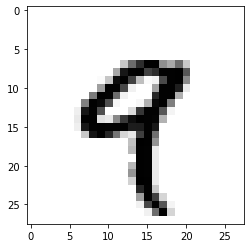

In [81]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# Etap kompilacji

In [82]:
# przygotowanie funkcji straty, optymalizatora i metryki monitorowania
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Przygotowanie danych

In [83]:
# zmieniamy kształt przyjmowany przez sieć
#   z zakresu [0, 255] o wymiarach (60000, 28, 28)
#   na zakres [0, 1] o wymiarach (60000, 28*28)
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

# Przygotowanie etykiet

In [84]:
# dodatkowo kodujemy etykiety za pomocą kategorii - zamiast 1,2..8,9 jest 1 = 1,0,0,0,0,0,0,0 , 2 = 0,1,0,0,0,0,0 itd.
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Trenowanie sieci

In [85]:
network.fit(train_images, train_labels, epochs=4, batch_size=128)

Epoch 1/4
469/469 [==============================] - 6s 14ms/step - loss: 0.2322 - accuracy: 0.9284
Epoch 2/4
469/469 [==============================] - 6s 14ms/step - loss: 0.0889 - accuracy: 0.9742
Epoch 3/4
469/469 [==============================] - 6s 14ms/step - loss: 0.0649 - accuracy: 0.9818
Epoch 4/4
469/469 [==============================] - 6s 14ms/step - loss: 0.0505 - accuracy: 0.9852


# Sprawdzanie dokładności przetwarzania testowego zbioru danych

In [86]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1008 - accuracy: 0.9769
test_acc 0.9768999814987183


# Inne

In [87]:
# krojenie tensora
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
my_slice = train_images[10:100, (train_images.shape[1]//4):-(train_images.shape[1]//4), (train_images.shape[1]//4):-(train_images.shape[1]//4)]
my_slice.shape

(90, 14, 14)